<a href="https://colab.research.google.com/github/satyakala-teja/analytics-capstone-satyakala/blob/main/notebooks/07_large_dataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective

In this notebook, I will generate a large synthetic dataset (5,000+ rows) that simulates customer purchase behavior.
I will then apply machine learning techniques to classify whether a customer is likely to place a High Value Order.

What This Notebook Covers

Generating a realistic large dataset

Feature engineering

Exploratory data analysis

Classification model training

Model evaluation (accuracy, classification report, confusion matrix)

This notebook demonstrates my ability to handle large data volumes and build predictive models end-to-end.

In [2]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of rows
num_rows = 5000

# Generate synthetic dataset
df = pd.DataFrame({
    'customer_id': np.random.randint(1000, 9999, num_rows),
    'region': np.random.choice(['East', 'West', 'North', 'South'], num_rows),
    'category': np.random.choice(['Electronics', 'Furniture', 'Clothing', 'Grocery'], num_rows),
    'quantity': np.random.randint(1, 10, num_rows),
    'unit_price': np.random.uniform(50, 1500, num_rows).round(2),
})

# Create sales = quantity × unit_price
df['sales'] = (df['quantity'] * df['unit_price']).round(2)

# Create target: high value = 1 if sales > 5000
df['is_high_value'] = df['sales'].apply(lambda x: 1 if x > 5000 else 0)

# Display first rows
df.head()


,customer_id,region,category,quantity,unit_price,sales,is_high_value
0,8270,East,Clothing,2,1039.74,2079.48,0
1,1860,South,Clothing,1,1270.33,1270.33,0
2,6390,South,Electronics,7,242.23,1695.61,0
3,6191,East,Grocery,2,1006.61,2013.22,0
4,6734,South,Grocery,1,883.94,883.94,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    5000 non-null   int64  
 1   region         5000 non-null   object 
 2   category       5000 non-null   object 
 3   quantity       5000 non-null   int64  
 4   unit_price     5000 non-null   float64
 5   sales          5000 non-null   float64
 6   is_high_value  5000 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 273.6+ KB


In [ ]:
df.describe()


,customer_id,quantity,unit_price,sales,is_high_value
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5481.434600,4.959200,767.088932,3801.696184,0.294600
std,2576.534793,2.580013,415.539739,3061.872416,0.455908
min,1001.000000,1.000000,50.010000,52.910000,0.000000
25%,3225.500000,3.000000,406.592500,1291.760000,0.000000
50%,5494.500000,5.000000,764.125000,2901.395000,0.000000
75%,7707.250000,7.000000,1119.010000,5663.220000,1.000000
max,9996.000000,9.000000,1499.840000,13442.130000,1.000000


In [3]:
# Features and target
X = df[['quantity', 'unit_price', 'sales']]
y = df['is_high_value']


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [6]:
y_pred = model.predict(X_test)


In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.998

In [8]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       698
           1       0.99      1.00      1.00       302

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



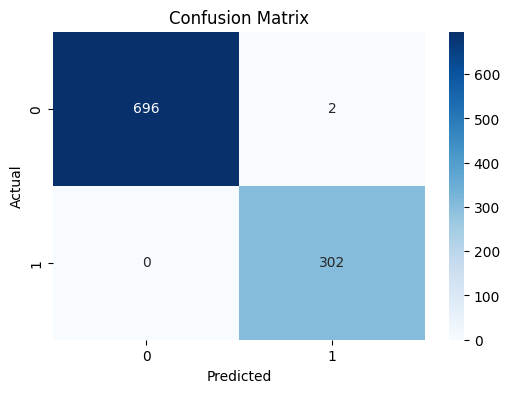

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
import numpy as np

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance


,feature,importance
2,sales,0.609871
1,unit_price,0.206647
0,quantity,0.183482


from matplotlib import pyplot as plt
_df_8['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['importance'].plot(kind='hist', bins=20, title='importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='index', y='importance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['importance'].plot(kind='line', figsize=(8, 4), title='importance')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='index', y='feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='importance', y='feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

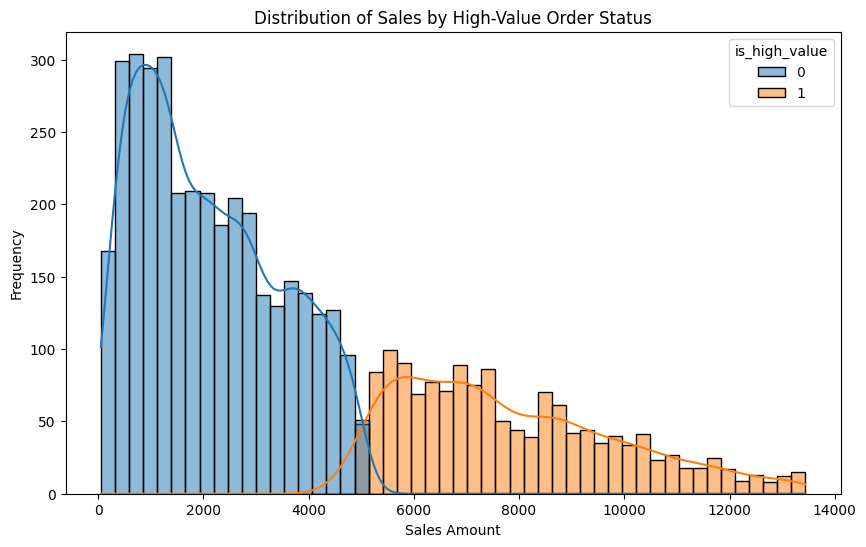

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sales', hue='is_high_value', kde=True, bins=50)
plt.title('Distribution of Sales by High-Value Order Status')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()